In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
from google.colab import drive

# Force remount Google Drive to obtain a new authentication code
drive.mount('/content/drive', force_remount=True)


Mounted at /content/drive


In [ ]:
import tensorflow as tf
import matplotlib as plt
import pandas as pd
import seaborn as sns

In [ ]:
import tensorflow as tf

# Path to your dataset directory in Google Drive
dataset_dir = '/content/drive/MyDrive/Plant-Disease-Detection/Plant_Disease_Detection/train'

# Create image dataset
training_set = tf.keras.utils.image_dataset_from_directory(
    dataset_dir,
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 70640 files belonging to 38 classes.


In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import os

# Create a data augmentation generator
datagen = ImageDataGenerator(
    rotation_range=20,      # randomly rotate images in the range (degrees, 0 to 180)
    width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
    height_shift_range=0.1, # randomly shift images vertically (fraction of total height)
    shear_range=0.1,        # set range for random shear
    zoom_range=0.1,         # set range for random zoom
    horizontal_flip=True,   # randomly flip images horizontally
    vertical_flip=True,     # randomly flip images vertically
    fill_mode='nearest'     # fill mode for points outside the input boundaries
)

# Path to save augmented images
augmented_data_dir = '/content/drive/MyDrive/Plant_Disease_Detection/augmented_images'

# Create the directory if it does not exist
os.makedirs(augmented_data_dir, exist_ok=True)

# Generate augmented images
batch_size = 32
num_augmented_images = 2000  # Generate 2000 augmented images
num_batches = num_augmented_images // batch_size

# Use the data augmentation generator to augment the training images
augmented_generator = datagen.flow_from_directory(
    dataset_dir,                 # directory containing original images
    target_size=(128, 128),      # resize images to 128x128
    batch_size=batch_size,       # batch size
    class_mode='categorical',    # class mode
    save_to_dir=augmented_data_dir,  # directory to save augmented images
    save_prefix='aug',           # prefix for filenames of saved images
    save_format='jpeg'           # format for saved images
)

# Generate augmented images
for i in range(num_batches):
    batch = augmented_generator.next()

print("Augmentation complete. Augmented images saved to:", augmented_data_dir)


Found 70640 images belonging to 38 classes.


KeyboardInterrupt: 

In [ ]:
# Path to your validation dataset directory in Google Drive
validation_dir = '/content/drive/MyDrive/Plant-Disease-Detection/Plant_Disease_Detection/valid'

# Create validation image dataset
validation_set = tf.keras.utils.image_dataset_from_directory(
    validation_dir,
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 17577 files belonging to 38 classes.


In [ ]:
cnn = tf.keras.models.Sequential()

In [ ]:
cnn.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,padding='same',activation='relu',input_shape=[128,128,3]))
cnn.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [ ]:
cnn.add(tf.keras.layers.Conv2D(filters=64,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=64,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [ ]:
cnn.add(tf.keras.layers.Conv2D(filters=128,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=128,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [ ]:
cnn.add(tf.keras.layers.Conv2D(filters=256,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=256,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [ ]:
cnn.add(tf.keras.layers.Conv2D(filters=512,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=512,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [ ]:
cnn.add(tf.keras.layers.Dropout(0.25))

In [ ]:
cnn.add(tf.keras.layers.Flatten())

In [ ]:
cnn.add(tf.keras.layers.Dense(units=1500,activation='relu'))

In [ ]:
cnn.add(tf.keras.layers.Dropout(0.4)) #To avoid overfitting

In [ ]:
#Output Layer
cnn.add(tf.keras.layers.Dense(units=38,activation='softmax'))

In [ ]:
cnn.compile(optimizer=tf.keras.optimizers.legacy.Adam(
    learning_rate=0.0001),loss='categorical_crossentropy',metrics=['accuracy'])

In [ ]:
cnn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 128, 128, 32)      896       
                                                                 
 conv2d_1 (Conv2D)           (None, 126, 126, 32)      9248      
                                                                 
 max_pooling2d (MaxPooling2  (None, 63, 63, 32)        0         
 D)                                                              
                                                                 
 conv2d_2 (Conv2D)           (None, 63, 63, 64)        18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 61, 61, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 30, 30, 64)        0         
 g2D)                                                   

In [ ]:
training_history = cnn.fit(x=training_set,validation_data=validation_set,epochs=10)

Epoch 1/10
2208/2208 [==============================] - 6585s 3s/step - loss: 1.3214 - accuracy: 0.6109 - val_loss: 0.6193 - val_accuracy: 0.7967
Epoch 2/10
2208/2208 [==============================] - 913s 413ms/step - loss: 0.4316 - accuracy: 0.8639 - val_loss: 0.2795 - val_accuracy: 0.9089
Epoch 3/10
2208/2208 [==============================] - 914s 414ms/step - loss: 0.2641 - accuracy: 0.9148 - val_loss: 0.2617 - val_accuracy: 0.9126
Epoch 4/10
2208/2208 [==============================] - 926s 419ms/step - loss: 0.1810 - accuracy: 0.9407 - val_loss: 0.1681 - val_accuracy: 0.9463
Epoch 5/10
2208/2208 [==============================] - 922s 417ms/step - loss: 0.1332 - accuracy: 0.9563 - val_loss: 0.1616 - val_accuracy: 0.9481
Epoch 6/10
2208/2208 [==============================] - 929s 421ms/step - loss: 0.1059 - accuracy: 0.9650 - val_loss: 0.1301 - val_accuracy: 0.9598
Epoch 7/10
2208/2208 [==============================] - 921s 417ms/step - loss: 0.0837 - accuracy: 0.9724 - val_lo

In [ ]:
#Training set Accuracy
train_loss, train_acc = cnn.evaluate(training_set)
print('Training accuracy:', train_acc)

2208/2208 [==============================] - 203s 91ms/step - loss: 0.0421 - accuracy: 0.9866
Training accuracy: 0.986594021320343


In [ ]:
#Validation set Accuracy
val_loss, val_acc = cnn.evaluate(validation_set)
print('Validation accuracy:', val_acc)

550/550 [==============================] - 51s 91ms/step - loss: 0.1335 - accuracy: 0.9613
Validation accuracy: 0.961256206035614


In [ ]:
cnn.save('trained_plant_disease_model.keras')

In [ ]:
import tensorflow as tf

# Specify the directory path where you want to save the model
save_directory = '/content/drive/MyDrive/Plant-Disease-Detection/Plant_Disease_Detection'

# Ensure the directory exists (create it if it doesn't)
import os
os.makedirs(save_directory, exist_ok=True)

# Specify the full path including the filename for saving the model
model_filename = 'trained_plant_disease_model.keras'
model_path = os.path.join(save_directory, model_filename)

# Save the model to the specified path
cnn.save(model_path)

print(f"Model saved successfully at: {model_path}")


Model saved successfully at: /content/drive/MyDrive/Plant-Disease-Detection/Plant_Disease_Detection/trained_plant_disease_model.keras


In [ ]:
training_history.history #Return Dictionary of history

{'loss': [1.321387767791748,
  0.43164005875587463,
  0.2640558183193207,
  0.18102121353149414,
  0.13316330313682556,
  0.10592802613973618,
  0.08365374803543091,
  0.07090523838996887,
  0.06067465990781784,
  0.05328883230686188],
 'accuracy': [0.610900342464447,
  0.8638589978218079,
  0.9147791862487793,
  0.9406851530075073,
  0.9563278555870056,
  0.9650198221206665,
  0.9724235534667969,
  0.976557195186615,
  0.9802095293998718,
  0.9832106232643127],
 'val_loss': [0.6193053126335144,
  0.27949362993240356,
  0.2616609036922455,
  0.1680901050567627,
  0.16164638102054596,
  0.13014157116413116,
  0.12449587136507034,
  0.10301438719034195,
  0.11476831138134003,
  0.13352322578430176],
 'val_accuracy': [0.7967230081558228,
  0.9088581800460815,
  0.9126130938529968,
  0.9462934732437134,
  0.9480571150779724,
  0.9597769975662231,
  0.9607441425323486,
  0.9674574732780457,
  0.9656369090080261,
  0.961256206035614]}

In [ ]:
#Recording History in json
import json
with open('training_hist.json','w') as f:
  json.dump(training_history.history,f)

In [ ]:
print(training_history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


In [ ]:
import matplotlib.pyplot as plt


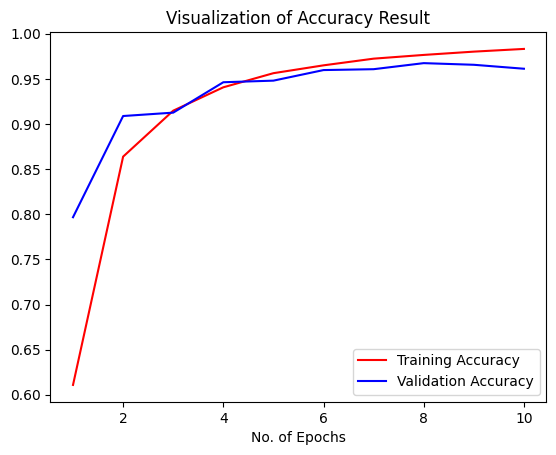

In [ ]:
epochs = [i for i in range(1,11)]
plt.plot(epochs,training_history.history['accuracy'],color='red',label='Training Accuracy')
plt.plot(epochs,training_history.history['val_accuracy'],color='blue',label='Validation Accuracy')
plt.xlabel('No. of Epochs')
plt.title('Visualization of Accuracy Result')
plt.legend()
plt.show()

In [ ]:
class_name = validation_set.class_names

In [ ]:
test_dir = '/content/drive/MyDrive/Plant-Disease-Detection/Plant_Disease_Detection/valid'


test_set = tf.keras.utils.image_dataset_from_directory(
   test_dir,
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=1,
    image_size=(128, 128),
    shuffle=False,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)


Found 17577 files belonging to 38 classes.


In [ ]:
y_pred = cnn.predict(test_set)
predicted_categories = tf.argmax(y_pred, axis=1)

17577/17577 [==============================] - 198s 11ms/step


In [ ]:
true_categories = tf.concat([y for x, y in test_set], axis=0)
Y_true = tf.argmax(true_categories, axis=1)

In [ ]:
Y_true

<tf.Tensor: shape=(17577,), dtype=int64, numpy=array([ 0,  0,  0, ..., 37, 37, 37])>

In [ ]:
predicted_categories

<tf.Tensor: shape=(17577,), dtype=int64, numpy=array([ 0,  0,  0, ..., 37, 37, 37])>

In [ ]:
from sklearn.metrics import confusion_matrix,classification_report
cm = confusion_matrix(Y_true,predicted_categories)

In [ ]:
# Precision Recall Fscore
print(classification_report(Y_true,predicted_categories,target_names=class_name))

                                                    precision    recall  f1-score   support

                                Apple___Apple_scab       0.99      0.85      0.92       504
                                 Apple___Black_rot       1.00      0.98      0.99       497
                          Apple___Cedar_apple_rust       0.97      0.99      0.98       440
                                   Apple___healthy       0.87      0.96      0.92       502
                               Blueberry___healthy       0.95      0.98      0.97       454
          Cherry_(including_sour)___Powdery_mildew       0.99      0.98      0.98       426
                 Cherry_(including_sour)___healthy       0.99      0.99      0.99       456
Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot       0.93      0.96      0.94       410
                       Corn_(maize)___Common_rust_       0.99      0.99      0.99       477
               Corn_(maize)___Northern_Leaf_Blight       0.98      0.93      0.

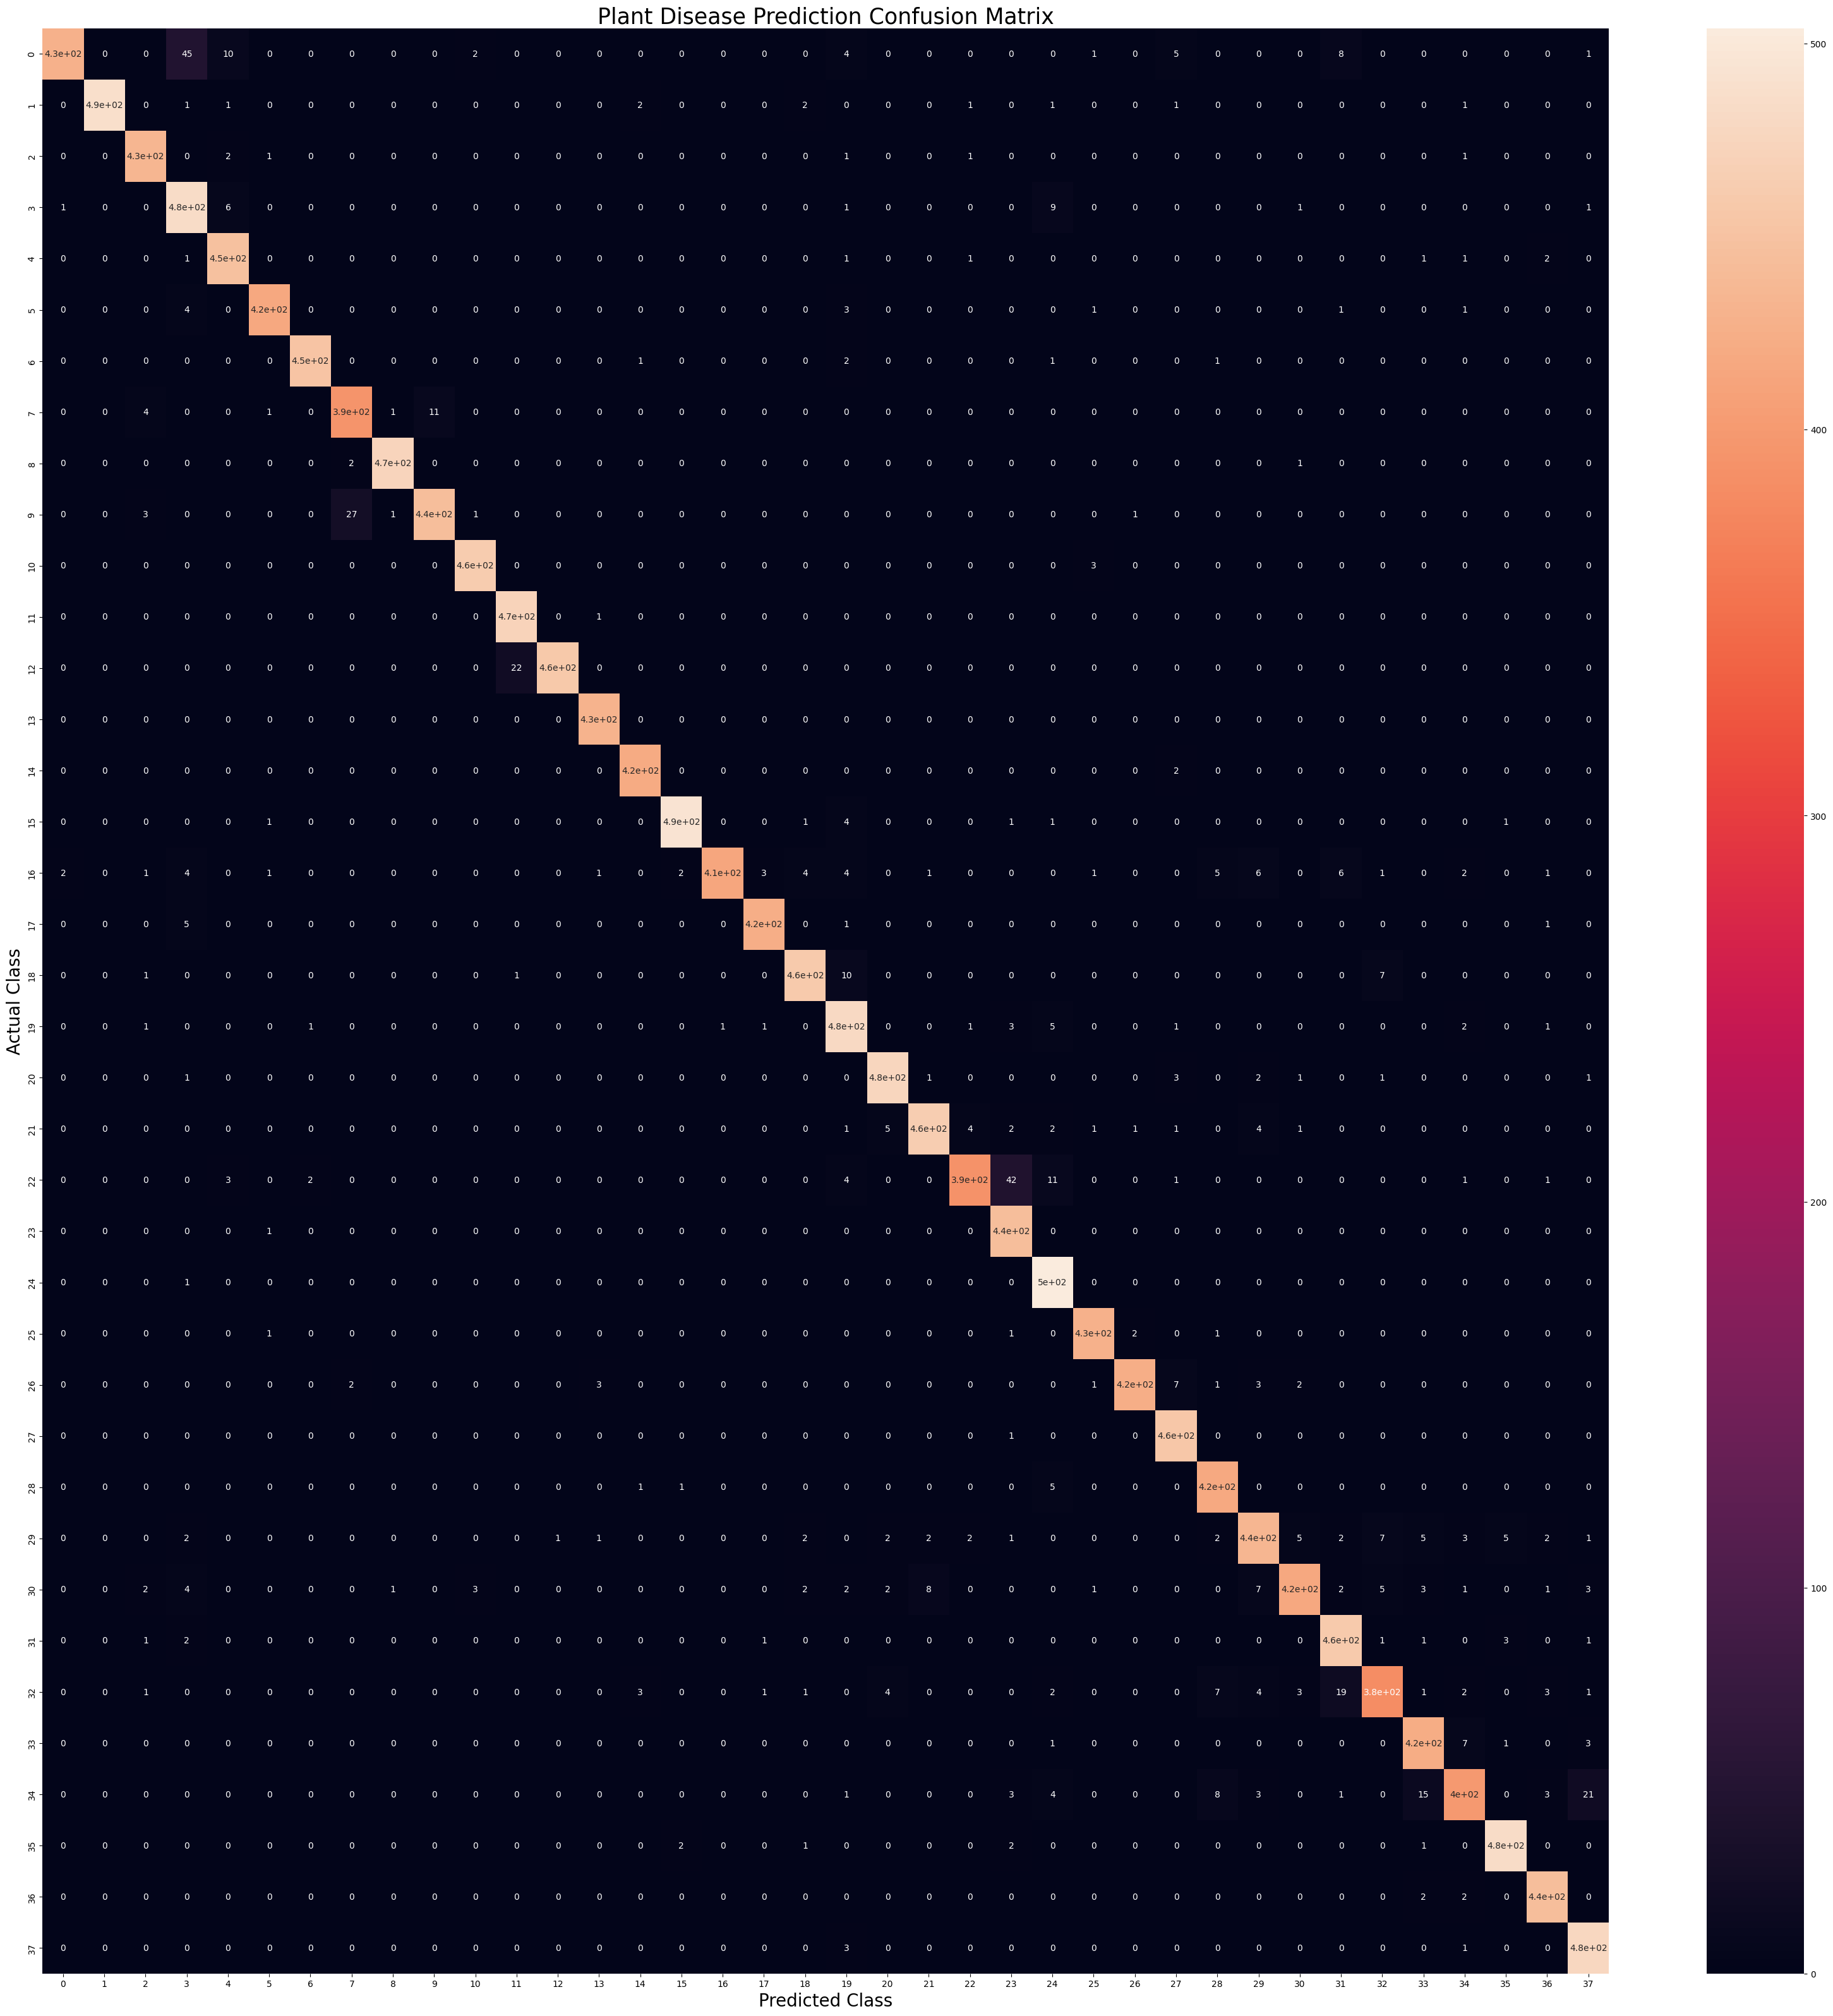

In [ ]:
plt.figure(figsize=(40, 40))
sns.heatmap(cm,annot=True,annot_kws={"size": 10})

plt.xlabel('Predicted Class',fontsize = 20)
plt.ylabel('Actual Class',fontsize = 20)
plt.title('Plant Disease Prediction Confusion Matrix',fontsize = 25)
plt.show()

In [ ]:
from google.colab import drive
import os

# Mount Google Drive
drive.mount('/content/drive')

# List contents of your Google Drive directory
drive_dir = '/content/drive/MyDrive/'
print("Contents of Google Drive:")
print(os.listdir(drive_dir))


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Contents of Google Drive:
['Insa ', 'AAOUINA HABITAT AGRICULTURE and asse.pv.pdf', 'PC Tout-en-un .pdf', 'Cours 1 S. El Kazzouli pour INSA (1).pdf', 'Cours 2 Constante déquilibre.pdf', 'Cours 1 S. El Kazzouli pour INSA.pdf', 'A9F88E9E-F2B0-4D31-95A1-88C895464412.jpeg', '749DFE68-38E3-4B11-A5AF-38A5CCD2D91D.jpeg', 'CamScanner 02-03-2021 11.02_1.pdf', 'Formulaire Choix de la filiere.docx', 'Copy of Formulaire Choix de la filiere.docx', 'Pack 1ère année', 'PACK PARRAIN 1A 2018 2019', 'Analysing NFT projects.gsheet', 'liamnft1.PNG', 'liamnft2.PNG', 'liamnft3.PNG', 'liamnft4.PNG', 'A6E99DEC-72F1-48DB-ACD8-C4A28FAE4065.jpeg', 'ED037C21-1D30-4196-952F-322658904A16.png', 'Site sans titre.gsite', 'Certificate - AMLD Africa 2022.pdf', '08D9033A-7793-435C-A4CB-D803465EB491.jpeg', 'CV Anas Belmessid (3).pdf', 'Certificate - AMLD Africa 2022.gdoc', 'Sweedish', 'H3.wav'